<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/miky_terzoEsperimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

In [ ]:
# Prendo i dati che mi servono dei ristoranti

asian = res['ethnicity'] == 'asian'
mexican = res['ethnicity'] == 'hispanic, latino, or spanish origin'
black_american = res['ethnicity'] == 'black or african american'
white_american = res['ethnicity'] == 'white'
positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'
american_restaurant = res['typology'] == 'American'
asian_restaurant = res['typology'] == 'Japanese'
mexican_restaurant = res['typology'] == 'Mexican'
nc = res['zone'] == 'NC'  # North Carolina
az = res['zone'] == 'AZ'  # Arizona
nv = res['zone'] == 'NV'  # Nevada
feminine = res['gender'] == 'feminine'
masculine = res['gender'] == 'masculine'

# elimino dal dataframe le righe che non sono state riconosciute e presentano questa scritta
res = res[((res.age != 'Not recognized'))]

# WOMEN AND MEN SENTIMENT GROUP BY ZONE

totWomen_NorthCarolinaRestaurants = len(res[(feminine) & (nc)])
totWomen_ArizonaRestaurants = len(res[(feminine) & (az)])
totWomen_NevadaRestaurants = len(res[(feminine) & (nv)])

totMen_NorthCarolinaRestaurants = len(res[(masculine) & (nc)])
totMen_ArizonaRestaurants = len(res[(masculine) & (az)])
totMen_NevadaRestaurants = len(res[(masculine) & (nv)])

# POSITIVI
# numero medio di positive sentiment di donne e uomini nelle rispettive zone
nc_women_positive = (len(res[(feminine) & (nc) & (positive)]) * 100) / totWomen_NorthCarolinaRestaurants
az_women_positive = (len(res[(feminine) & (az) & (positive)]) * 100) / totWomen_ArizonaRestaurants
nv_women_positive = ((len(res[(feminine) & (nv) & (positive)])) * 100) / totWomen_NevadaRestaurants

nc_men_positive = (len(res[(masculine) & (nc) & (positive)]) * 100) / totMen_NorthCarolinaRestaurants
az_men_positive = (len(res[(masculine) & (az) & (positive)]) * 100) / totMen_ArizonaRestaurants
nv_men_positive = ((len(res[(masculine) & (nv) & (positive)])) * 100) / totMen_NevadaRestaurants
                          
# NEGATIVI
# numero medio di negative sentiment di donne e uomini nelle rispettive zone
nc_women_negative = (len(res[(feminine) & (nc) & (negative)]) * 100) / totWomen_NorthCarolinaRestaurants
az_women_negative = (len(res[(feminine) & (az) & (negative)]) * 100) / totWomen_ArizonaRestaurants
nv_women_negative = ((len(res[(feminine) & (nv) & (negative)])) * 100) / totWomen_NevadaRestaurants

nc_men_negative = (len(res[(masculine) & (nc) & (negative)]) * 100) / totMen_NorthCarolinaRestaurants
az_men_negative = (len(res[(masculine) & (az) & (negative)]) * 100) / totMen_ArizonaRestaurants
nv_men_negative = ((len(res[(masculine) & (nv) & (negative)])) * 100) / totMen_NevadaRestaurants

# NEUTRI
# numero medio di neutral sentiment di donne e uomini nelle rispettive zone
nc_women_neutral = (len(res[(feminine) & (nc) & (neutral)]) * 100) / totWomen_NorthCarolinaRestaurants
az_women_neutral = (len(res[(feminine) & (az) & (neutral)]) * 100) / totWomen_ArizonaRestaurants
nv_women_neutral = ((len(res[(feminine) & (nv) & (neutral)])) * 100) / totWomen_NevadaRestaurants

nc_men_neutral = (len(res[(masculine) & (nc) & (neutral)]) * 100) / totMen_NorthCarolinaRestaurants
az_men_neutral = (len(res[(masculine) & (az) & (neutral)]) * 100) / totMen_ArizonaRestaurants
nv_men_neutral = ((len(res[(masculine) & (nv) & (neutral)])) * 100) / totMen_NevadaRestaurants


100.0
100.0
100.0
100.0
99.99999999999999
100.0


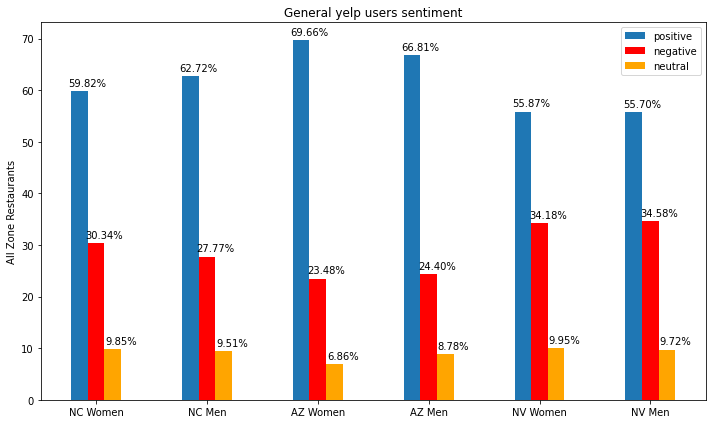

In [16]:
# Costruisco il grafico

labels = ['NC Women', 'NC Men', 'AZ Women', 'AZ Men', 'NV Women', 'NV Men']

# GRAFICO PER I RISTORANTI PER ZONA -> CHI E' CHE HA PIU RECENSIONI POSITIVE, NEGATIVE E NEUTRE TRA I TRE RISTORANTI AMERICANI

# valori barre
positive = [nc_women_positive, nc_men_positive, az_women_positive, az_men_positive, nv_women_positive, nv_men_positive]
negative = [nc_women_negative, nc_men_negative, az_women_negative, az_men_negative, nv_women_negative, nv_men_negative]
neutral = [nc_women_neutral, nc_men_neutral, az_women_neutral, az_men_neutral, nv_women_neutral, nv_men_neutral]

print(nc_women_positive + nc_women_negative + nc_women_neutral)
print(nc_men_positive + nc_men_negative + nc_men_neutral)
print(az_women_positive + az_women_negative + az_women_neutral)
print(az_men_positive + az_men_negative + az_men_neutral)
print(nv_women_positive + nv_women_negative + nv_women_neutral)
print(nv_men_positive + nv_men_negative + nv_men_neutral)

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Zone Restaurants')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()